# Modelos de Machine Learning

## pip install scikit-learn

In [3]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

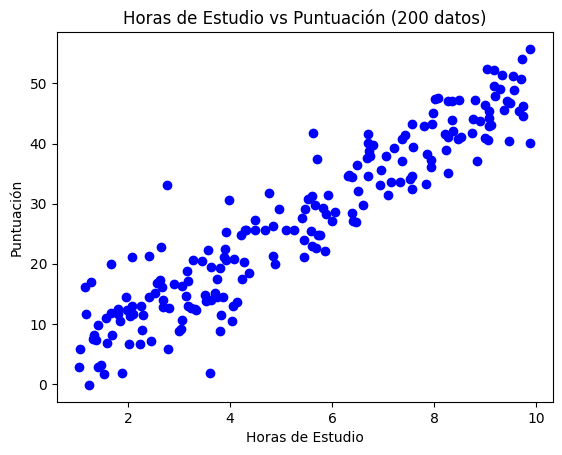

In [4]:
#Base de datos de ejemplo
np.random.seed(42)
horas_estudio = np.random.uniform(1, 10, 200) 
puntuacion = 5 * horas_estudio + np.random.normal(0, 5, 200) 
df = pd.DataFrame({'Horas de Estudio': horas_estudio, 'Puntuación': puntuacion})

plt.scatter(df['Horas de Estudio'], df['Puntuación'], color='blue')
plt.title('Horas de Estudio vs Puntuación (200 datos)')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación')
plt.show()

# # Base de datos de entrenamiento y de prueba

In [5]:
X = df[['Horas de Estudio']]
y = df['Puntuación']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,Horas de Estudio
79,2.042822
197,9.073992
38,7.158097
24,5.104630
122,3.862031
...,...
106,4.693446
14,2.636425
92,7.847065
179,2.237688


In [7]:
X_test

,Horas de Estudio
95,5.444160
15,2.650641
30,6.467904
158,3.138738
128,1.062569
115,8.843145
69,9.881982
170,7.098079
174,6.806555
45,6.962701


# Regresión lineal

In [8]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df['Horas de Estudio'].corr(df['Puntuación'], method='pearson')

print(f"Coeficiente de correlación de Pearson: {correlacion_pearson}")

Coeficiente de correlación de Pearson: 0.9384060584957605


El uso de la regresión lineal es apropiado cuando hay una correlación lineal fuerte entre las variables independientes y la variable dependiente. Los valores de Pearson recomendables para aplicar este modelo serían:

0.7 a 1 o -0.7 a -1: Se considera que hay una fuerte correlación. En estos casos, la regresión lineal es bastante recomendable, ya que las variables muestran una relación claramente definida.

0.5 a 0.7 o -0.5 a -0.7: Indica una correlación moderada. Todavía puede ser válido usar la regresión lineal, pero el ajuste del modelo podría no ser tan preciso, y podrías explorar otras variables o modelos para mejorar los resultados.

Menor a 0.5: Si el coeficiente es muy bajo, la relación lineal entre las variables es débil. En este caso, la regresión lineal podría no ser el mejor enfoque, y modelos más complejos (como regresiones no lineales, modelos de machine learning más avanzados, o transformación de variables) podrían ser más adecuados.

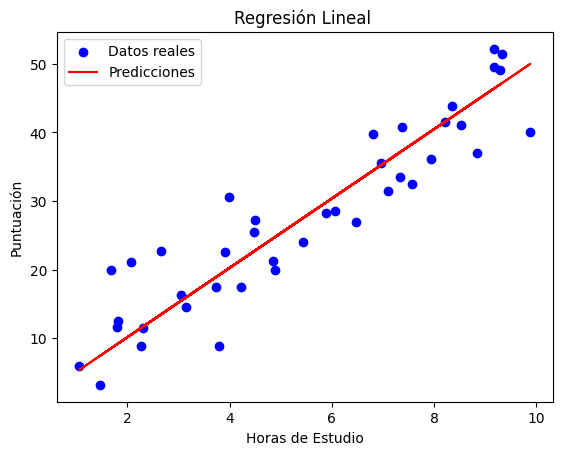

In [9]:
# Creación del modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.title('Regresión Lineal ')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación')
plt.legend()
plt.show()


In [10]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Mostrar coeficientes
print(f"Intersección (β0): {modelo.intercept_}")
print(f"Coeficiente de la variable independiente (β1): {modelo.coef_[0]}")

Error Cuadrático Medio (MSE): 27.11559656363673
Coeficiente de Determinación (R^2): 0.841259999430026
Intersección (β0): 0.01451761638451643
Coeficiente de la variable independiente (β1): 5.058168655793246


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Extraer los datos de la base de datos
X = np.array(X_test).ravel() 
y = np.array(y_test).ravel()

# Seleccionar 40 puntos al azar para mostrar los errores
np.random.seed(1)
indices_aleatorios = np.random.choice(len(X), 40, replace=False)

# Función para graficar y ajustar la recta
def graficar_recta_interactiva(m, b):
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Graficar los puntos de horas de estudio vs puntuación
    ax.scatter(X, y, label='Puntuaciones reales')
    
    # Calcular la recta de regresión lineal ajustada por el usuario
    recta = m * X + b
    
    # Graficar la recta ajustada
    ax.plot(X, recta, color='red', label=f'Recta: y = {m:.2f}x + {b:.2f}', linewidth=2)
    
    # Graficar los errores para 8 puntos seleccionados al azar
    for i in indices_aleatorios:
        ax.plot([X[i], X[i]], [y[i], recta[i]], color='blue', linestyle='--', linewidth=1)
    
    # Calcular el error cuadrático medio (MSE)
    mse = np.mean((y - recta) ** 2)
    
    # Mostrar el error medio en el título de la gráfica
    ax.set_title(f'Horas de Estudio y Puntuaciones\nError Medio Cuadrático (MSE): {mse:.2f}')
    ax.set_xlabel('Horas de Estudio')
    ax.set_ylabel('Puntuación')
    ax.legend()
    ax.grid(True)
    
    # Mostrar la gráfica
    plt.show()

# Crear deslizadores interactivos para m y b
interact(graficar_recta_interactiva,
         m=FloatSlider(min=0, max=10, step=0.1, value=10, description='Pendiente (m)'),
         b=FloatSlider(min=-10, max=10, step=0.5, value=1, description='Valor b'))


interactive(children=(FloatSlider(value=10.0, description='Pendiente (m)', max=10.0), FloatSlider(value=1.0, d…

<function __main__.graficar_recta_interactiva(m, b)>

# Regresión polinómica

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# Crear un DataFrame con datos ficticios
data = {
    'X': np.linspace(-3, 3, 100),  # 100 puntos entre -3 y 3
}
df = pd.DataFrame(data)
df['y'] = df['X'] - 2 * (df['X'] ** 2) + np.random.normal(-3, 3, 100)  # Relación cuadrática con ruido
df

,X,y
0,-3.000000,-27.919581
1,-2.939394,-18.245075
2,-2.878788,-22.808119
3,-2.818182,-23.743014
4,-2.757576,-18.966875
...,...,...
95,2.757576,-17.735349
96,2.818182,-13.492344
97,2.878788,-13.272746
98,2.939394,-12.940943


In [79]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['X']].values  # Variable independiente
y = df['y'].values     # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [80]:
# Crear el modelo de características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [81]:
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test_poly)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 7.334846788990733
R^2 Score: 0.8413218236233376


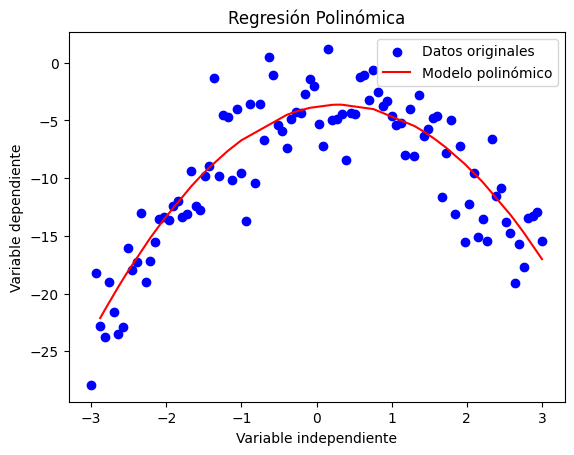

In [86]:
# Gráfica de los datos originales y el modelo ajustado
plt.scatter(df['X'], df['y'], color='blue', label='Datos originales')

# Ordenar X_test para la visualización
sorted_indices = np.argsort(X_test.flatten())  # Obtener índices de ordenamiento
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Modelo polinómico')
plt.title('Regresión Polinómica')
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.legend()
plt.show()


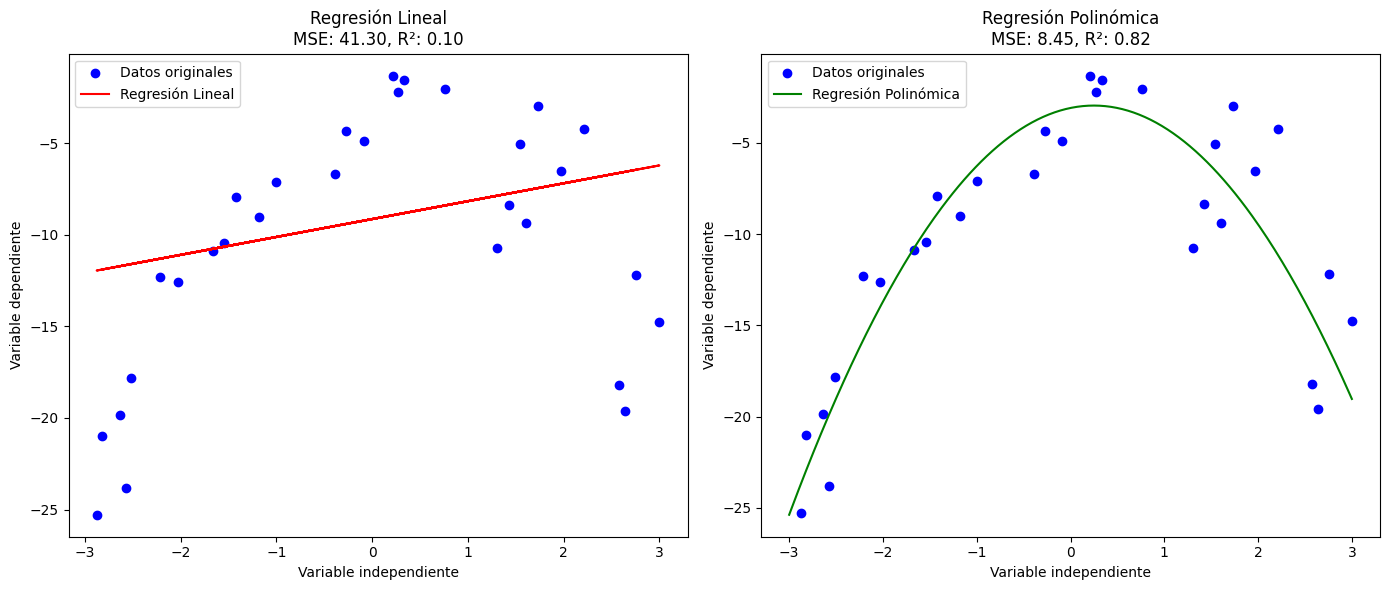

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Crear un DataFrame con datos ficticios
data = {
    'X': np.linspace(-3, 3, 100),  # 100 puntos entre -3 y 3
}
df = pd.DataFrame(data)
df['y'] = df['X'] - 2 * (df['X'] ** 2) + np.random.normal(-3, 3, 100)  # Relación cuadrática con ruido

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['X']].values  # Variable independiente
y = df['y'].values     # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calcular MSE y R² para regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Crear el modelo de características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modelo de regresión polinómica
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_poly = polynomial_model.predict(X_test_poly)

# Calcular MSE y R² para regresión polinómica
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Para la gráfica, generamos un rango denso de valores de X
X_range = np.linspace(-3, 3, 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred_poly_range = polynomial_model.predict(X_range_poly)

# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de regresión lineal
axs[0].scatter(X_test, y_test, color='blue', label='Datos originales')
axs[0].plot(X_test, y_pred_linear, color='red', label='Regresión Lineal')
axs[0].set_title(f'Regresión Lineal\nMSE: {mse_linear:.2f}, R²: {r2_linear:.2f}')
axs[0].set_xlabel('Variable independiente')
axs[0].set_ylabel('Variable dependiente')
axs[0].legend()

# Gráfica de regresión polinómica
axs[1].scatter(X_test, y_test, color='blue', label='Datos originales')
axs[1].plot(X_range, y_pred_poly_range, color='green', label='Regresión Polinómica')
axs[1].set_title(f'Regresión Polinómica\nMSE: {mse_poly:.2f}, R²: {r2_poly:.2f}')
axs[1].set_xlabel('Variable independiente')
axs[1].set_ylabel('Variable dependiente')
axs[1].legend()

plt.tight_layout()
plt.show()


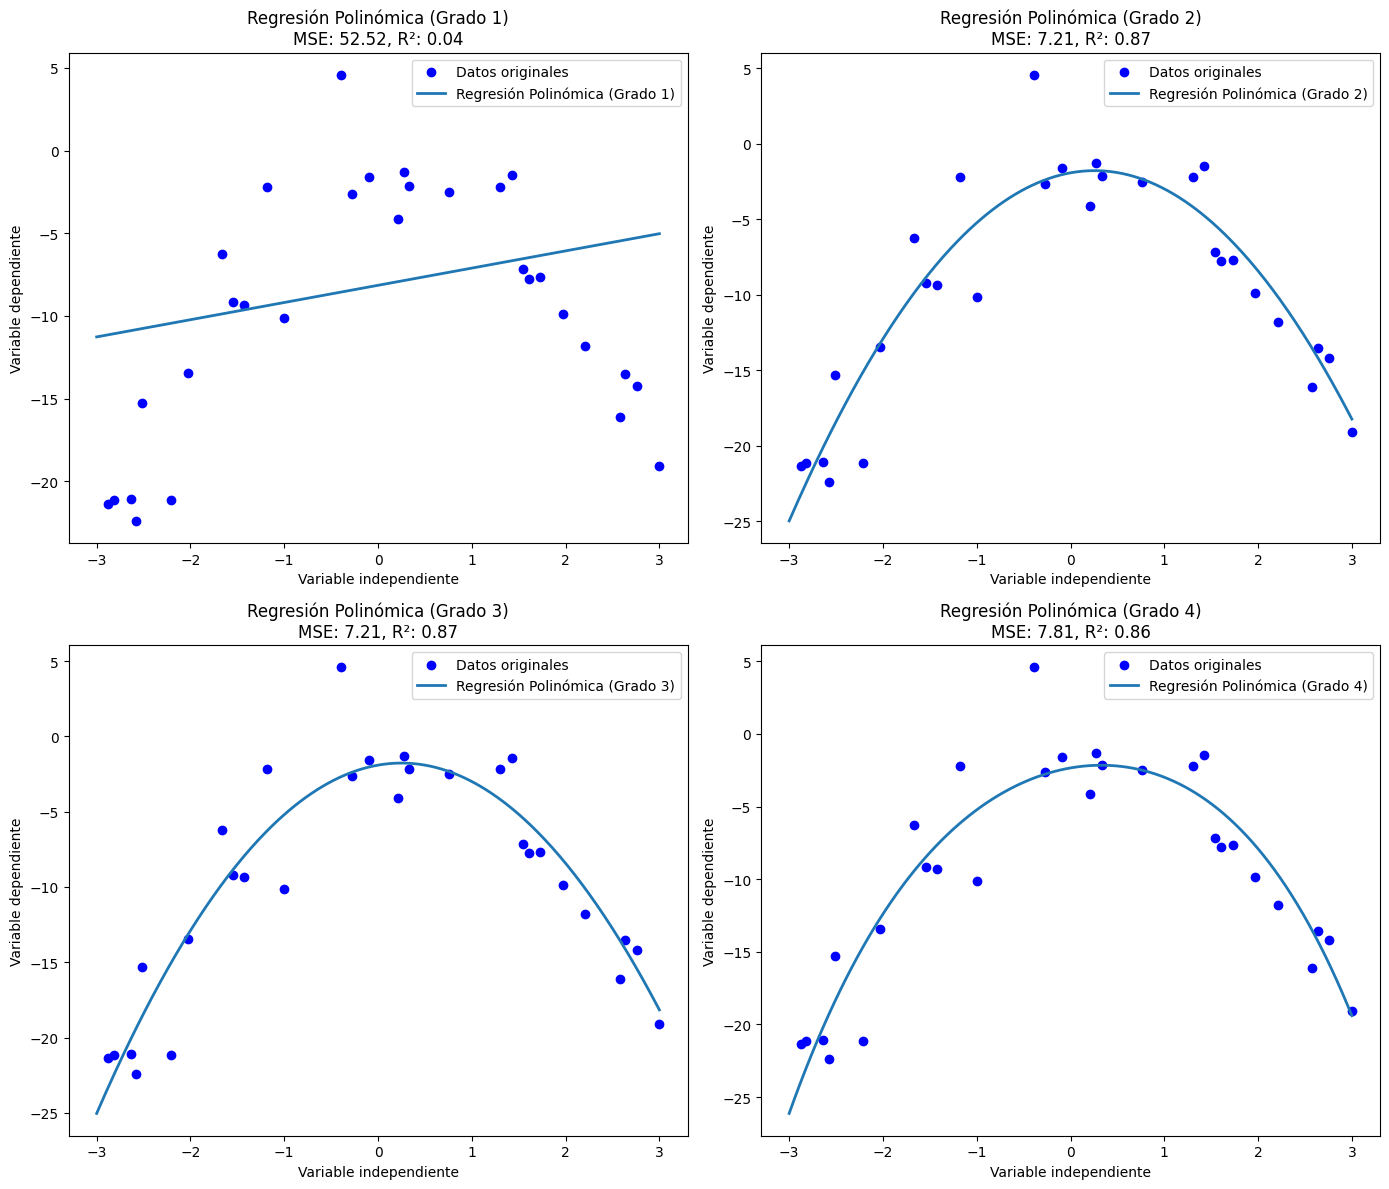

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Crear un DataFrame con datos ficticios
data = {
    'X': np.linspace(-3, 3, 100),  # 100 puntos entre -3 y 3
}
df = pd.DataFrame(data)
df['y'] = df['X'] - 2 * (df['X'] ** 2) + np.random.normal(-3, 3, 100)  # Relación cuadrática con ruido

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['X']].values  # Variable independiente
y = df['y'].values     # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Lista para almacenar los resultados de cada modelo
results = []

# Ajustar y evaluar modelos de regresión lineal y polinómica (grado 1 a 4)
for degree in range(1, 5):
    # Crear el modelo de características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Modelo de regresión
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    # Calcular MSE y R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar resultados
    results.append((degree, mse, r2, model, poly))

# Crear subgráficas
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Generar un rango denso de valores de X para las gráficas
X_range = np.linspace(-3, 3, 300).reshape(-1, 1)

# Graficar los resultados de cada modelo
for i, (degree, mse, r2, model, poly) in enumerate(results):
    # Predecir con el rango denso
    X_range_poly = poly.transform(X_range)
    y_pred_range = model.predict(X_range_poly)

    # Determinar la posición de la subgráfica
    ax = axs[i // 2, i % 2]
    ax.scatter(X_test, y_test, color='blue', label='Datos originales')
    ax.plot(X_range, y_pred_range, label=f'Regresión Polinómica (Grado {degree})', linewidth=2)
    ax.set_title(f'Regresión Polinómica (Grado {degree})\nMSE: {mse:.2f}, R²: {r2:.2f}')
    ax.set_xlabel('Variable independiente')
    ax.set_ylabel('Variable dependiente')
    ax.legend()

plt.tight_layout()
plt.show()


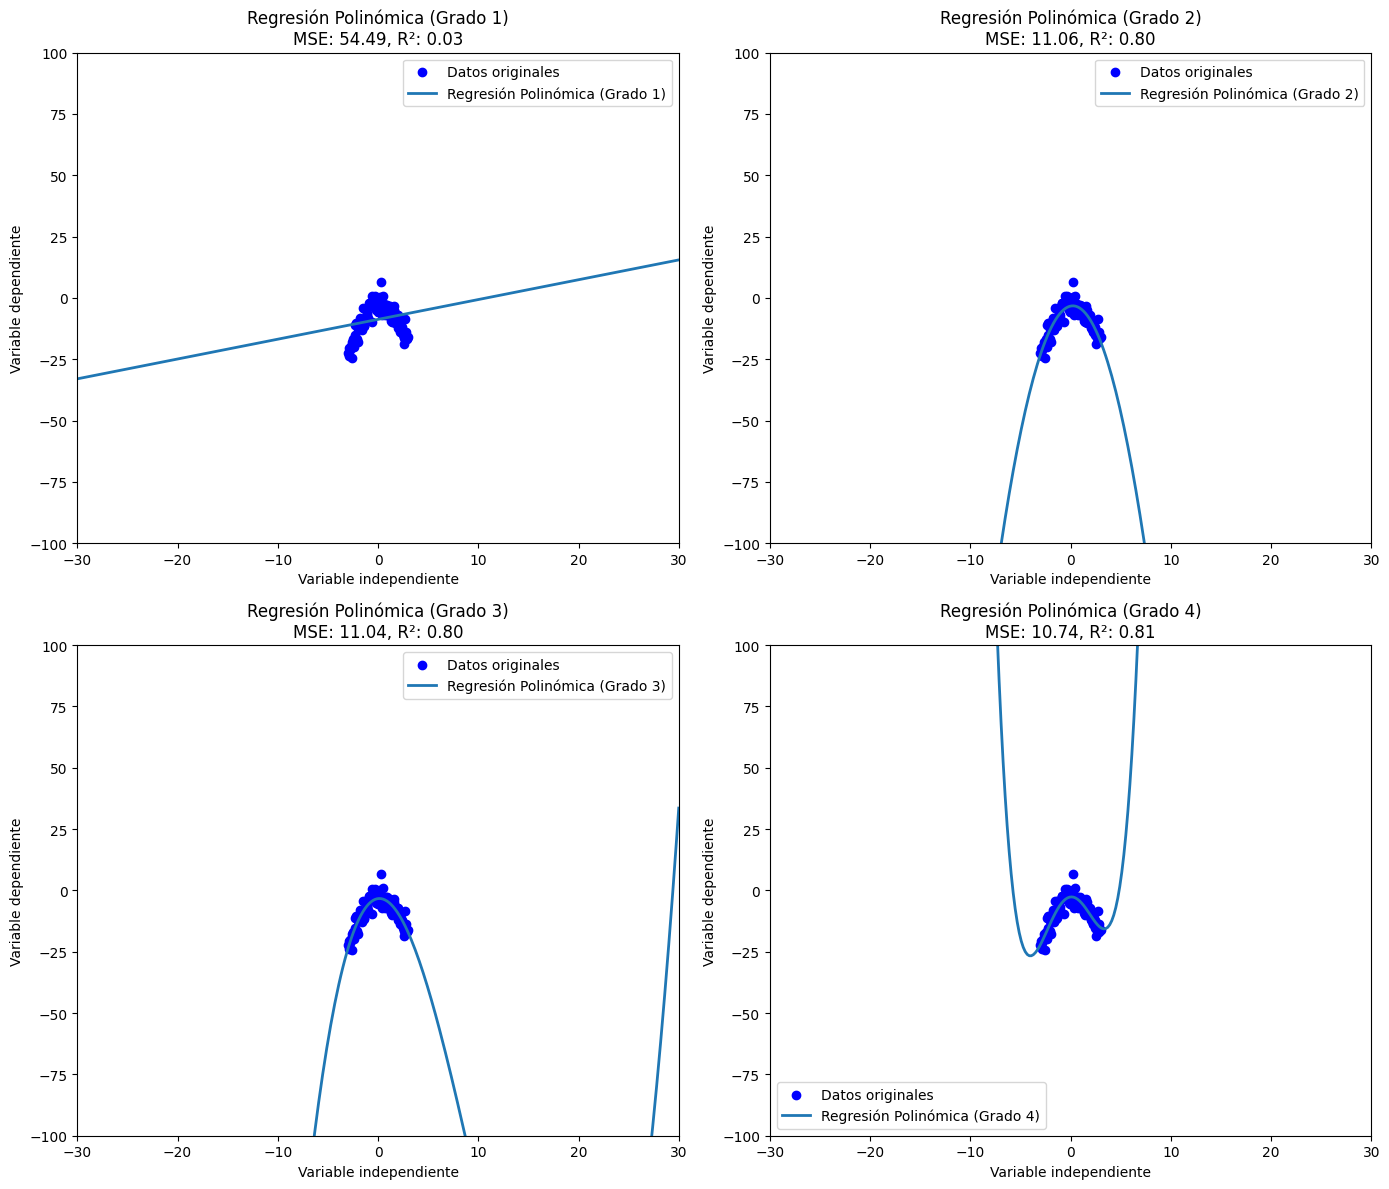

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Crear un DataFrame con datos ficticios
data = {
    'X': np.linspace(-3, 3, 100),  # 100 puntos entre -3 y 3
}
df = pd.DataFrame(data)
df['y'] = df['X'] - 2 * (df['X'] ** 2) + np.random.normal(-3, 3, 100)  # Relación cuadrática con ruido

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['X']].values  # Variable independiente
y = df['y'].values     # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Lista para almacenar los resultados de cada modelo
results = []

# Ajustar y evaluar modelos de regresión lineal y polinómica (grado 1 a 4)
for degree in range(1, 5):
    # Crear el modelo de características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Modelo de regresión
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    # Calcular MSE y R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar resultados
    results.append((degree, mse, r2, model, poly))

# Crear subgráficas
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Generar un rango denso de valores de X para las gráficas
X_range = np.linspace(-30, 30, 300).reshape(-1, 1)  # Rango de -30 a 30

# Graficar los resultados de cada modelo
for i, (degree, mse, r2, model, poly) in enumerate(results):
    # Predecir con el rango denso
    X_range_poly = poly.transform(X_range)
    y_pred_range = model.predict(X_range_poly)

    # Determinar la posición de la subgráfica
    ax = axs[i // 2, i % 2]
    ax.scatter(X, y, color='blue', label='Datos originales')  # Usar todos los datos
    ax.plot(X_range, y_pred_range, label=f'Regresión Polinómica (Grado {degree})', linewidth=2)
    ax.set_title(f'Regresión Polinómica (Grado {degree})\nMSE: {mse:.2f}, R²: {r2:.2f}')
    ax.set_xlabel('Variable independiente')
    ax.set_ylabel('Variable dependiente')
    ax.legend()
    ax.set_xlim([-30, 30])  # Establecer límites del eje x
    ax.set_ylim([-100, 100])  # Ajustar el límite del eje y para una mejor visualización

plt.tight_layout()
plt.show()


# Regresión Logística en Machine Learning

La **regresión logística** es un modelo estadístico que se utiliza para predecir la probabilidad de un evento binario. Es especialmente útil cuando la variable dependiente es categórica, como "sí" o "no", "0" o "1".

## Conceptos Clave
- **Función Sigmoide**: La función logística transforma los valores de entrada en probabilidades entre 0 y 1.
  
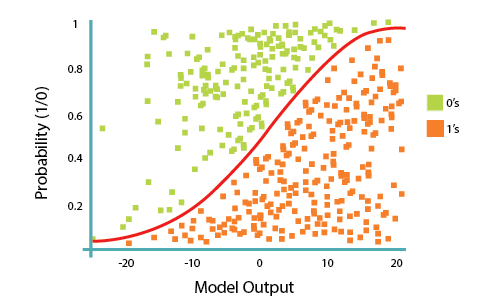

  donde \( z \) es una combinación lineal de las variables independientes.

  
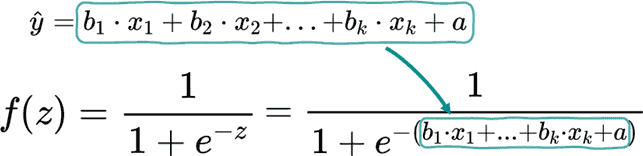

- **Predicciones**: Las predicciones se realizan estableciendo un umbral (típicamente 0.5) para decidir entre las clases.




Precisión del modelo: 1.00
Matriz de confusión:
[[26  0]
 [ 0 19]]


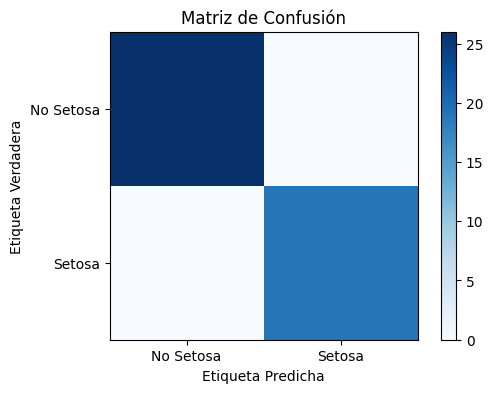

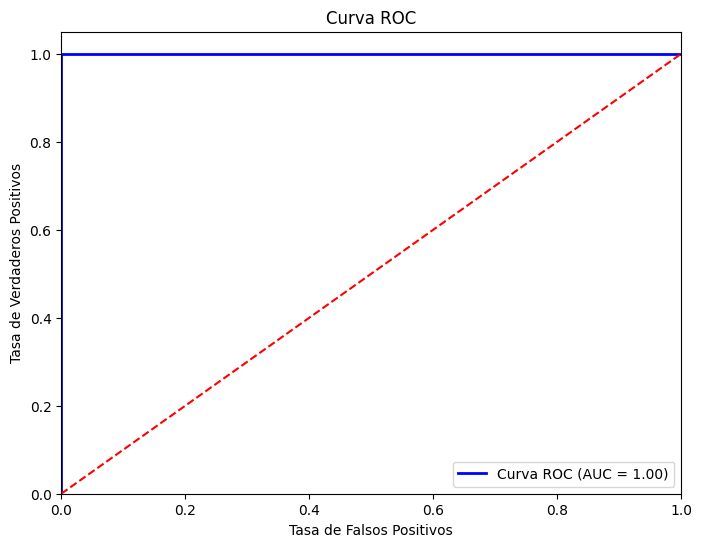

In [95]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Convertir a problema binario (Setosa vs No Setosa)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Setosa', 'Setosa'])
plt.yticks(tick_marks, ['No Setosa', 'Setosa'])
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()



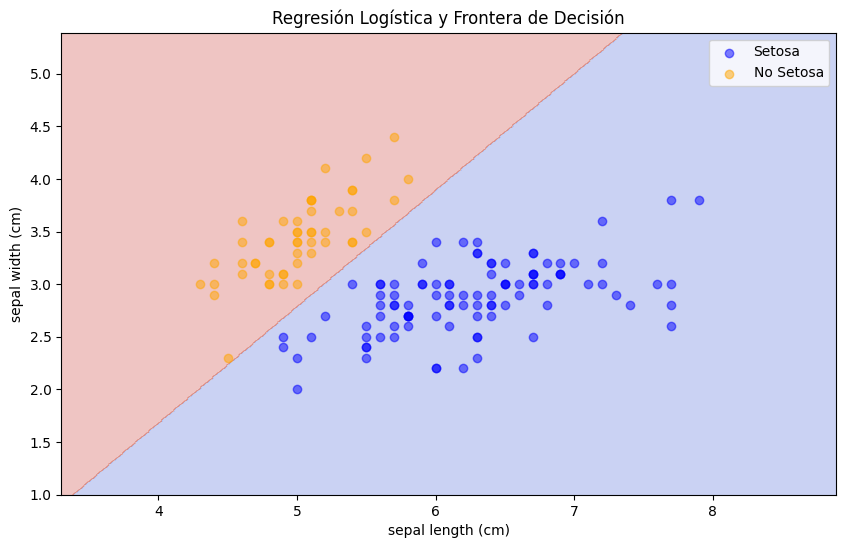

In [98]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características
y = (iris.target == 0).astype(int)  # Convertir a problema binario (Setosa vs No Setosa)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clase para cada punto de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Mapa de colores para la frontera
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Setosa', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='No Setosa', alpha=0.5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Regresión Logística y Frontera de Decisión')
plt.legend()
plt.show()


# Árbol de Decisión en Machine Learning

## Introducción
Los árboles de decisión son una técnica popular en machine learning para la clasificación y regresión. Se utilizan para predecir el valor de una variable objetivo (dependiente) en función de una o más variables explicativas (independientes).

## Funcionamiento
Un árbol de decisión se construye dividiendo los datos en conjuntos más pequeños mientras se forma un modelo en forma de árbol. Cada nodo interno representa una prueba en una característica, cada rama representa el resultado de la prueba, y cada hoja representa una clase (o valor de predicción).




In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# Cargar el conjunto de datos del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
# Seleccionar características relevantes
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Convertir la columna 'Sex' a valores numéricos
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Manejar valores faltantes en 'Age' y 'Fare'
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Separar las características y la variable objetivo
X = data.drop('Survived', axis=1)
y = data['Survived']


C:\Users\Jaime\AppData\Local\Temp\ipykernel_11924\564907277.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Jaime\AppData\Local\Temp\ipykernel_11924\564907277.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [108]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [109]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [110]:
# Hacer predicciones
y_pred = model.predict(X_test)


Accuracy: 0.76
Matriz de Confusión:
[[129  28]
 [ 36  75]]


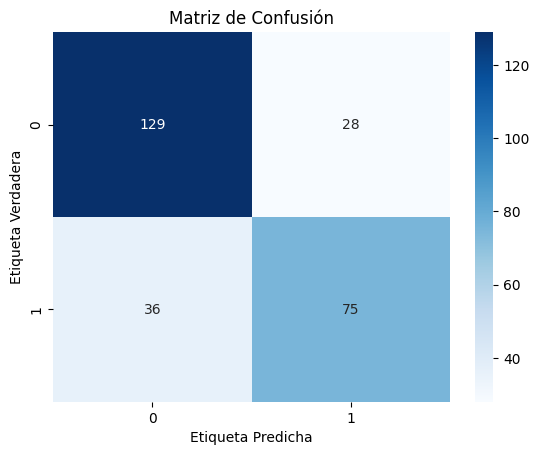

Tasa de Falsos Positivos: 0.18
Tasa de Falsos Negativos: 0.32


In [111]:
# Evaluar el modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(confusion_matrix)

# Visualizar la matriz de confusión
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Calcular tasas de falsos positivos y falsos negativos
false_positive_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
false_negative_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
print(f'Tasa de Falsos Positivos: {false_positive_rate:.2f}')
print(f'Tasa de Falsos Negativos: {false_negative_rate:.2f}')


In [4]:
datos={'Nombre':['juan'],'Edad':[25],'Género':['Masculino']}
x_prueba=pd.DataFrame(datos)
x_prueba

,Nombre,Edad,Género
0,juan,25,Masculino


In [ ]:
# Hacer predicciones
y_pred = model.predict(x_prueba)
print(f'la predicción es que: {y_pred}')